In [ ]:
# import pkl with cleaned text- the only preprocessing done is to remove non-letter or number characters from the text and lowercase it
# next remove stopwords and lemmatize or stem the text
# then use LDA to parse topics


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')


In [ ]:
import pandas as pd
import pickle
import os
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import gensim
import gensim.corpora as corpora
from gensim.models.coherencemodel import CoherenceModel
from gensim.corpora.dictionary import Dictionary

import matplotlib.pyplot as plt
from gensim.models import Phrases
from gensim.models.phrases import Phraser
import numpy as np
#from kneed import KneeLocator # ! pip install kneed

In [ ]:
# Read in the data
reviews = pickle.load(open('/Users/Melissa/Desktop/NLP_Fall2021/final_project/data.pkl', 'rb'))


In [ ]:
# Remove stopwords + a few more
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw = stopwords.words('english')
sw.extend(['many', 'good', 'like', 'liked', 'well', 'great', 'get', 'also', 'really', 'very', 'put'])
 
# Remove custom stopwords
def rem_sw(var):
    my_test = [word for word in var.split() if word not in sw]
    my_test = ' '.join(my_test)
    return my_test

# Remove words less than 3 characters
def length_fun(var):
    tmp_txt = [word for word in var.split() if len(word) > 2]
    tmp_txt = ' '.join(tmp_txt)
    return tmp_txt

# Stem text
def stem_fun(var):
    from nltk.stem.porter import PorterStemmer
    stemmer = PorterStemmer()
    tmp_txt = [stemmer.stem(word) for word in var.split()]
    tmp_txt = ' '.join(tmp_txt)
    return tmp_txt

# Lemmatize the text
nltk.download('punkt')
nltk.download('wordnet')
wordnet_lemmatizer = WordNetLemmatizer()

def lemmatize_fun(var):
    tmp_txt = [wordnet_lemmatizer.lemmatize(word) for word in var.split()]
    tmp_txt = ' '.join(tmp_txt)
    return tmp_txt


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/Melissa/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/Melissa/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /Users/Melissa/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
# Text has been cleaned to only include words and numbers, had stopwords removed, words less than 3 characters removed, and lemmatized (not stemmed here)
reviews['review_body_clean_2'] = reviews['review_body_clean'].apply(rem_sw).apply(length_fun).apply(lemmatize_fun).apply(rem_sw).str.split() 


# Topic Modeling

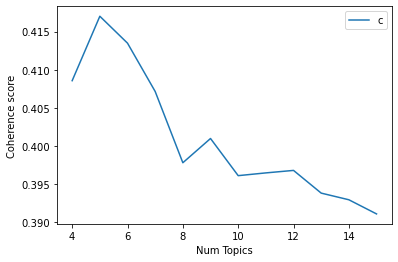

In [ ]:
# Unigrams 1
the_data = reviews.review_body_clean_2
dictionary = Dictionary(the_data)
dictionary.filter_extremes(no_below = 500, no_above = 0.75)

id2word = corpora.Dictionary(the_data)
id2word.filter_extremes(no_below = 500, no_above = 0.75)
corpus = [id2word.doc2bow(text) for text in the_data]

# Trying a range of number of topics
c_scores = list()
for word in range(4, 16):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=word, id2word=id2word, iterations=5, passes=5,random_state=123)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data,
                                              dictionary=dictionary,
                                              coherence='c_v')
    c_scores.append(coherence_model_lda.get_coherence())
    
x = range(4, 16)

plt.plot(x, c_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
# Topic Modeling with Unigrams- decide on topic count from above

# Testing a set number of topics
n_topics = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=n_topics, id2word=id2word, iterations=5, passes=5,random_state=123)
ldamodel.save('model5.gensim')

# Print the top words per topic
topics = ldamodel.print_topics(num_words = 10)
for topic in topics:
    print(topic)
        
# ompute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data,
                                         dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
 

(0, '0.119*"book" + 0.065*"series" + 0.046*"reading" + 0.037*"next" + 0.036*"one" + 0.030*"first" + 0.030*"wait" + 0.027*"enjoyed" + 0.023*"end" + 0.019*"keep"')
(1, '0.076*"love" + 0.034*"book" + 0.027*"one" + 0.027*"story" + 0.023*"loved" + 0.021*"want" + 0.020*"know" + 0.018*"never" + 0.014*"friend" + 0.013*"family"')
(2, '0.221*"book" + 0.171*"read" + 0.044*"would" + 0.035*"recommend" + 0.019*"easy" + 0.019*"author" + 0.018*"written" + 0.017*"time" + 0.016*"fun" + 0.015*"highly"')
(3, '0.026*"life" + 0.017*"book" + 0.014*"time" + 0.014*"people" + 0.013*"thing" + 0.013*"way" + 0.013*"make" + 0.011*"year" + 0.011*"one" + 0.011*"give"')
(4, '0.119*"story" + 0.088*"character" + 0.023*"novel" + 0.020*"interesting" + 0.019*"romance" + 0.018*"author" + 0.018*"plot" + 0.015*"short" + 0.015*"writing" + 0.014*"little"')

Coherence Score:  0.41701197299887516


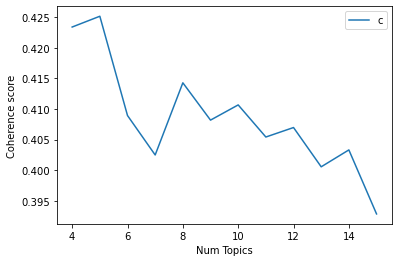

In [ ]:
# Unigrams 2- less strict thresholds
the_data2 = reviews.review_body_clean_2
dictionary2 = Dictionary(the_data2)
dictionary2.filter_extremes(no_below = 500, no_above = 0.50)

id2word2 = corpora.Dictionary(the_data2)
id2word2.filter_extremes(no_below = 500, no_above = 0.50)
corpus2 = [id2word2.doc2bow(text) for text in the_data2]

# Trying a range of number of topics
c_scores2 = list()
for word in range(4, 16):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus2, num_topics=word, id2word=id2word2, iterations=5, passes=5,random_state=123)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data2,
                                              dictionary=dictionary2,
                                              coherence='c_v')
    c_scores2.append(coherence_model_lda.get_coherence())
    
x = range(4, 16)

plt.plot(x, c_scores2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
# Topic Modeling with Unigrams 2- decide on topic count

# Testing a set number of topics
n_topics = 5
ldamodel2 = gensim.models.ldamodel.LdaModel(corpus2, num_topics=n_topics, id2word=id2word2, iterations=5, passes=5,random_state=123)
ldamodel2.save('model5_2.gensim')

# Print the top words per topic
topics = ldamodel2.print_topics(num_words=10)

for topic in topics:
    print(topic)
        
#compute Coherence Score using c_v
coherence_model_lda2 = CoherenceModel(model=ldamodel2, texts=the_data2,
                                         dictionary=dictionary2, coherence='c_v')
coherence_lda2 = coherence_model_lda2.get_coherence()
print('\nCoherence Score: ', coherence_lda2)


(0, '0.086*"read" + 0.054*"series" + 0.043*"love" + 0.040*"story" + 0.037*"one" + 0.035*"loved" + 0.035*"character" + 0.031*"next" + 0.030*"reading" + 0.025*"wait"')
(1, '0.045*"time" + 0.026*"know" + 0.026*"thing" + 0.025*"think" + 0.024*"one" + 0.024*"make" + 0.018*"read" + 0.017*"want" + 0.017*"say" + 0.015*"going"')
(2, '0.068*"story" + 0.040*"character" + 0.037*"would" + 0.029*"little" + 0.023*"read" + 0.019*"romance" + 0.019*"much" + 0.018*"part" + 0.018*"first" + 0.018*"bit"')
(3, '0.045*"life" + 0.032*"love" + 0.018*"story" + 0.017*"family" + 0.015*"find" + 0.014*"friend" + 0.014*"real" + 0.014*"woman" + 0.014*"way" + 0.014*"one"')
(4, '0.041*"read" + 0.034*"recommend" + 0.030*"author" + 0.027*"interesting" + 0.027*"written" + 0.026*"would" + 0.024*"story" + 0.021*"reader" + 0.019*"easy" + 0.016*"novel"')

Coherence Score:  0.4251618105898782


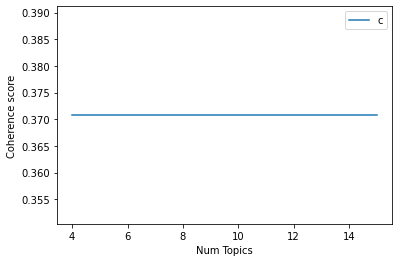

In [ ]:
# Unigrams 3- even less strict thresholds
the_data3 = reviews.review_body_clean_2
dictionary3 = Dictionary(the_data3)
dictionary3.filter_extremes(no_below = 5000, no_above = 0.50)

id2word3 = corpora.Dictionary(the_data3)
id2word3.filter_extremes(no_below = 5000, no_above = 0.50)
corpus3 = [id2word3.doc2bow(text) for text in the_data3]

# Trying a range of number of topics
c_scores3 = list()
for word in range(4, 16):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus3, num_topics=word, id2word=id2word3, iterations=5, passes=5,random_state=123)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data3,
                                              dictionary=dictionary3,
                                              coherence='c_v')
    c_scores3.append(coherence_model_lda.get_coherence())
    
x = range(4, 16)

plt.plot(x, c_scores3)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
# Dont even run for above this was terrible
# Topic Modeling with Unigrams 3- decide on topic count


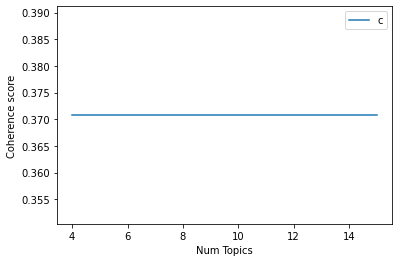

In [ ]:
# Unigrams 4- even less strict thresholds
the_data4 = reviews.review_body_clean_2
dictionary4 = Dictionary(the_data4)
dictionary4.filter_extremes(no_below = 5000)

id2word4 = corpora.Dictionary(the_data4)
id2word4.filter_extremes(no_below = 5000)
corpus4 = [id2word4.doc2bow(text) for text in the_data4]

# Trying a range of number of topics
c_scores4 = list()
for word in range(4, 16):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus4, num_topics=word, id2word=id2word4, iterations=5, passes=5,random_state=123)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data4,
                                              dictionary=dictionary4,
                                              coherence='c_v')
    c_scores4.append(coherence_model_lda.get_coherence())
    
x = range(4, 16)

plt.plot(x, c_scores4)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
# Dont even run for above this was terrible
# Topic Modeling with Unigrams 4- decide on topic count


### Best one below- 7 topics, 75% threshold

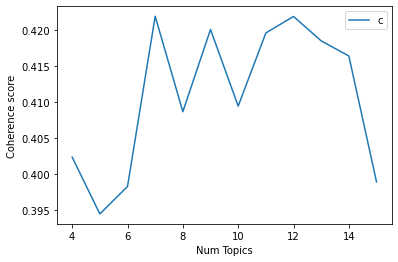

In [ ]:
# Unigrams 5- even less strict thresholds
the_data5 = reviews.review_body_clean_2
dictionary5 = Dictionary(the_data5)
dictionary5.filter_extremes(no_above = 0.75)

id2word5 = corpora.Dictionary(the_data5)
id2word5.filter_extremes(no_above = 0.75)
corpus5 = [id2word5.doc2bow(text) for text in the_data5]

# Trying a range of number of topics
c_scores5 = list()
for word in range(4, 16):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus5, num_topics=word, id2word=id2word5, iterations=5, passes=5,random_state=123)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data5,
                                              dictionary=dictionary5,
                                              coherence='c_v')
    c_scores5.append(coherence_model_lda.get_coherence())
    
x = range(4, 16)

plt.plot(x, c_scores5)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
c_scores5

[0.40235112600706074,
 0.394458424427795,
 0.3982692893167319,
 0.42195141623906346,
 0.40867904844597924,
 0.4201113452505256,
 0.4094542817262076,
 0.41963063426832714,
 0.4219213366745942,
 0.4185259148842181,
 0.4164238681924261,
 0.3989055081039572]

In [ ]:
# Topic Modeling with Unigrams 5- decide on topic count

# Testing a set number of topics
n_topics = 7
ldamodel5 = gensim.models.ldamodel.LdaModel(corpus5, num_topics=n_topics, id2word=id2word5, iterations=5, passes=5,random_state=123)
ldamodel5.save('model_7.gensim')

# Print the top words per topic
topics = ldamodel5.print_topics(num_words=10)

for topic in topics:
    print(topic)
        
#compute Coherence Score using c_v
coherence_model_lda5 = CoherenceModel(model=ldamodel5, texts=the_data5,
                                         dictionary=dictionary5, coherence='c_v')
coherence_lda5 = coherence_model_lda5.get_coherence()
print('\nCoherence Score: ', coherence_lda5)


(0, '0.039*"book" + 0.009*"author" + 0.009*"kindle" + 0.007*"information" + 0.007*"easy" + 0.006*"idea" + 0.006*"use" + 0.005*"word" + 0.005*"would" + 0.005*"work"')
(1, '0.055*"character" + 0.029*"story" + 0.018*"novel" + 0.014*"plot" + 0.011*"interesting" + 0.011*"read" + 0.011*"author" + 0.010*"action" + 0.009*"mystery" + 0.009*"writing"')
(2, '0.107*"story" + 0.053*"love" + 0.014*"short" + 0.013*"romance" + 0.013*"loved" + 0.010*"sex" + 0.009*"hot" + 0.009*"heart" + 0.008*"character" + 0.008*"little"')
(3, '0.021*"book" + 0.015*"thing" + 0.014*"one" + 0.014*"would" + 0.014*"think" + 0.013*"know" + 0.012*"time" + 0.012*"even" + 0.010*"much" + 0.010*"say"')
(4, '0.034*"life" + 0.015*"book" + 0.013*"people" + 0.010*"child" + 0.010*"world" + 0.008*"god" + 0.008*"way" + 0.008*"read" + 0.006*"history" + 0.006*"time"')
(5, '0.013*"family" + 0.011*"year" + 0.009*"man" + 0.008*"woman" + 0.008*"friend" + 0.007*"find" + 0.006*"one" + 0.006*"old" + 0.006*"new" + 0.006*"mother"')
(6, '0.143*"bo

### Stuff that I tried but did not use

In [ ]:
# Fetch more than unigrams- bigrams and trigrams to set up for topic modeling
def fetch_bi_grams(var):
    sentence_stream = np.array(var)
    bigram = Phrases(sentence_stream, min_count=25, threshold=500)
    trigram = Phrases(bigram[sentence_stream], min_count=25, threshold=500)
    bigram_phraser = Phraser(bigram)
    trigram_phraser = Phraser(trigram)
    bi_grams = list()
    tri_grams = list()
    for sent in sentence_stream:
        bi_grams.append(bigram_phraser[sent])
        tri_grams.append(trigram_phraser[sent])
    return bi_grams, tri_grams

bi, tri = fetch_bi_grams(reviews.review_body_clean_2)

In [ ]:
# Trigrams
the_data = tri
dictionary = Dictionary(the_data)
dictionary.filter_extremes(no_below=100, no_above=0.50)

id2word = corpora.Dictionary(the_data)
id2word.filter_extremes(no_below=100, no_above=0.50)
corpus = [id2word.doc2bow(text) for text in the_data]

# Trying a range of number of topics
c_scores = list()
for word in range(4, 16):
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=word, id2word=id2word, iterations=5, passes=5,random_state=123)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data,
                                              dictionary=dictionary,
                                              coherence='c_v')
    c_scores.append(coherence_model_lda.get_coherence())
    
x = range(4, 16)

plt.plot(x, c_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()


In [ ]:
# Bigrams
the_data = bi
dictionary = Dictionary(the_data)
dictionary.filter_extremes(no_below=100, no_above=0.50)

id2word = corpora.Dictionary(the_data)
id2word.filter_extremes(no_below=100, no_above=0.50)
corpus = [id2word.doc2bow(text) for text in the_data]

n_topics = 10
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=n_topics, id2word=id2word, iterations=5, passes=5,random_state=123)
ldamodel.save('model5.gensim')
topics = ldamodel.print_topics(num_words=4)
for topic in topics:
    print(topic)
        
#compute Coherence Score using c_v
coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data,
                                         dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)
    

c_scores = list()
for word in range(1, 10):
    ldamodel = gensim.models.ldamodel.LdaModel(
            corpus, num_topics=word, id2word=id2word, iterations=10, passes=5,
            random_state=123)
    coherence_model_lda = CoherenceModel(model=ldamodel, texts=the_data,
                                              dictionary=dictionary,
                                              coherence='c_v')
    c_scores.append(coherence_model_lda.get_coherence())
    
x = range(1, 10)
kn = KneeLocator(x, c_scores,
                     curve='concave', direction='increasing')
opt_topics = kn.knee
print ("Optimal topics is", kn)
plt.plot(x, c_scores)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()